In [1]:
import pandas as pd
import numpy as np

In [2]:
data_1 = pd.read_csv("10246504_2018.csv", header=None)
data_2 = pd.read_csv("170070_2018.csv", header=None)
data_3 = pd.read_csv("170121_2018.csv", header=None)
data_4 = pd.read_csv("170130_2018.csv", header=None)
data_5 = pd.read_csv("201672_2018.csv", header=None)
data_6 = pd.read_csv("258467_2018.csv", header=None)
data_7 = pd.read_csv("258469_2018.csv", header=None)

In [3]:
data_1 = pd.DataFrame(data_1)
data_2 = pd.DataFrame(data_2)
data_3 = pd.DataFrame(data_3)
data_4 = pd.DataFrame(data_4)
data_5 = pd.DataFrame(data_5)
data_6 = pd.DataFrame(data_6)
data_7 = pd.DataFrame(data_7)

data_1 = data_1.rename(columns = {0:"data", 1:"cash", 2:"period"})
data_2 = data_2.rename(columns = {0:"data", 1:"cash", 2:"period"})
data_3 = data_3.rename(columns = {0:"data", 1:"cash", 2:"period"})
data_4 = data_4.rename(columns = {0:"data", 1:"cash", 2:"period"})
data_5 = data_5.rename(columns = {0:"data", 1:"cash", 2:"period"})
data_6 = data_6.rename(columns = {0:"data", 1:"cash", 2:"period"})
data_7 = data_7.rename(columns = {0:"data", 1:"cash", 2:"period"})

data_1.head()

,data,cash,period
0,2018-01-08 23:59:59,6156300,Выдача наличных денежных средств по УС 1024650...
1,2018-01-10 23:59:59,2123700,Выдача наличных денежных средств по УС 1024650...
2,2018-01-12 23:59:59,4243100,Выдача наличных денежных средств по УС 1024650...
3,2018-01-16 23:59:59,3444900,Выдача наличных денежных средств по УС 1024650...
4,2018-01-18 23:59:59,2649600,Выдача наличных денежных средств по УС 1024650...


In [4]:
import re

In [5]:
def bank(data):
    pattern = r"[\d\.]+"
    pattern_2 = r"[\.]+"
    bank = []
    
    for i in range(data.period.size):
        link = re.findall(pattern, data.period[i])
        link_bank = []
        for i in link:
            i = re.sub(pattern_2, "/", i)
            link_bank.append(i)
        bank.append(link_bank)

    bank = pd.DataFrame(bank, columns = ["bank", "data_1", "data_2"])
    
    bank['data_1'] = pd.to_datetime(bank['data_1'], format="%d/%m/%Y")
    bank['data_2'] = pd.to_datetime(bank['data_2'], format="%d/%m/%Y")
    
    return bank

In [6]:
bank_1 = bank(data_1)
bank_2 = bank(data_2)
bank_3 = bank(data_3)
bank_4 = bank(data_4)
bank_5 = bank(data_5)
bank_6 = bank(data_6)
bank_7 = bank(data_7)

bank_1.head()

,bank,data_1,data_2
0,10246504,2017-12-29,2018-01-08
1,10246504,2018-01-08,2018-01-10
2,10246504,2018-01-10,2018-01-12
3,10246504,2018-01-12,2018-01-16
4,10246504,2018-01-16,2018-01-18


In [7]:
import pylab as plt

In [8]:
data_1.drop(['period', 'data'], axis='columns', inplace=True)
data_2.drop(['period', 'data'], axis='columns', inplace=True)
data_3.drop(['period', 'data'], axis='columns', inplace=True)
data_4.drop(['period', 'data'], axis='columns', inplace=True)
data_5.drop(['period', 'data'], axis='columns', inplace=True)
data_6.drop(['period', 'data'], axis='columns', inplace=True)
data_7.drop(['period', 'data'], axis='columns', inplace=True)

In [9]:
df_1 = pd.concat((bank_1, data_1),axis=1)
df_2 = pd.concat((bank_2, data_2),axis=1)
df_3 = pd.concat((bank_3, data_3),axis=1)
df_4 = pd.concat((bank_4, data_4),axis=1)
df_5 = pd.concat((bank_5, data_5),axis=1)
df_6 = pd.concat((bank_6, data_6),axis=1)
df_7 = pd.concat((bank_7, data_7),axis=1)

df_1.head()

,bank,data_1,data_2,cash
0,10246504,2017-12-29,2018-01-08,6156300
1,10246504,2018-01-08,2018-01-10,2123700
2,10246504,2018-01-10,2018-01-12,4243100
3,10246504,2018-01-12,2018-01-16,3444900
4,10246504,2018-01-16,2018-01-18,2649600


In [10]:
import datetime

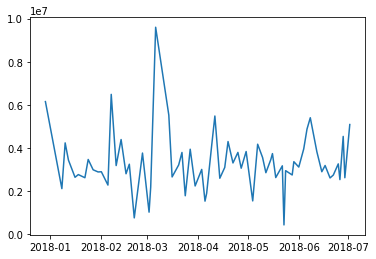

In [11]:
plt.plot(df_1.data_1, df_1.cash)

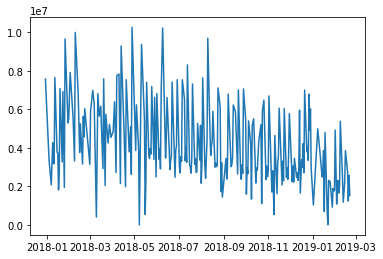

In [12]:
plt.plot(df_2.data_1, df_2.cash)

In [13]:
def features(df):
    
    df_days = []
    holiday_date = {1:[1,2,3,4,5,6,7,8], 2: [23], 3: [8], 4:[], 5: [1,9], 6: [12],7:[], 8:[], 9:[], 10:[], 11:[4], 12:[]}

    for i in range(df.data_1.size):
        start_date = df.data_1[i]
        end_date = df.data_2[i]
    
        weekend = 0
        weekdays = 0
        holiday = 0
        winter = False
        spring = False
        summer = False
        fall = False
        end_or_begin_month = False
        months = set()

        day_count = (end_date - start_date).days
        for single_date in [d for d in (start_date + datetime.timedelta(days=n) for n in range(day_count)) if d <= end_date]: 
            
            if single_date.strftime("%A") == 'Saturday' or single_date.strftime("%A") == 'Sunday':
                weekend += 1
            else:
                weekdays += 1
            
            month = holiday_date[single_date.month]
            if len(month) != 0:
                for day in month:
                    if day == single_date.day:
                        holiday += 1
            
            if single_date.day < 10 or single_date.day > 25:
                end_or_begin_month = True
        
            months.add(single_date.strftime("%m"))  
        for month in months:
            if month == "01" or month == "02" or month == "12":
                winter = True
            elif month == "03" or month == "04" or month == "05":
                spring = True
            elif month == "06" or month == "07" or month == "08":
                summer = True
            elif month == "09" or month == "10" or month == "11":
                fall = True
    
    
        df_day = [day_count, weekend, holiday, winter, spring, summer, fall, end_or_begin_month]
        df_days.append(df_day)

    days = pd.DataFrame(df_days, columns = ["weekdays", "weekend", "holiday", "winter", "spring", "summer", "fall", "end_or_begin_month"])   
    
    return days


In [14]:
features_1 = features(df_1) 
features_2 = features(df_2)
features_3 = features(df_3)
features_4 = features(df_4)
features_5 = features(df_5)
features_6 = features(df_6)
features_7 = features(df_7)

features_1.head()

,weekdays,weekend,holiday,winter,spring,summer,fall,end_or_begin_month
0,10,4,7,True,False,False,False,True
1,2,0,1,True,False,False,False,True
2,2,0,0,True,False,False,False,False
3,4,2,0,True,False,False,False,False
4,2,0,0,True,False,False,False,False


In [15]:
df_1 = pd.concat((df_1, features_1), axis=1)
df_2 = pd.concat((df_2, features_2), axis=1)
df_3 = pd.concat((df_3, features_3), axis=1)
df_4 = pd.concat((df_4, features_4), axis=1)
df_5 = pd.concat((df_5, features_5), axis=1)
df_6 = pd.concat((df_6, features_6), axis=1)
df_7 = pd.concat((df_7, features_7), axis=1)

df_1.head()

,bank,data_1,data_2,cash,weekdays,weekend,holiday,winter,spring,summer,fall,end_or_begin_month
0,10246504,2017-12-29,2018-01-08,6156300,10,4,7,True,False,False,False,True
1,10246504,2018-01-08,2018-01-10,2123700,2,0,1,True,False,False,False,True
2,10246504,2018-01-10,2018-01-12,4243100,2,0,0,True,False,False,False,False
3,10246504,2018-01-12,2018-01-16,3444900,4,2,0,True,False,False,False,False
4,10246504,2018-01-16,2018-01-18,2649600,2,0,0,True,False,False,False,False


In [16]:
#df_1_2 = df_1.append(df_2, ignore_index=True)
#df_3_4 = df_3.append(df_4, ignore_index=True)
#df_5_6 = df_5.append(df_6, ignore_index=True)
#df_1234 = df_1_2.append(df_3_4, ignore_index=True)
#df_567 = df_5_6.append(df_7, ignore_index=True)

#df = df_1234.append(df_567, ignore_index=True)
#df.head()

In [17]:
def norm(df, name_col):
    min = df[name_col].min()
    max = df[name_col].max()

    df[name_col] = (df[name_col] - min)/(max - min)

In [18]:
def norm_df(df):
    for name in ['cash', 'weekdays', 'weekend', 'holiday']:
        norm(df, name)


In [19]:
df_1.drop(['bank','data_1','data_2'], axis='columns', inplace=True)
df_2.drop(['bank','data_1','data_2'], axis='columns', inplace=True)
df_3.drop(['bank','data_1','data_2'], axis='columns', inplace=True)
df_4.drop(['bank','data_1','data_2'], axis='columns', inplace=True)
df_5.drop(['bank','data_1','data_2'], axis='columns', inplace=True)
df_6.drop(['bank','data_1','data_2'], axis='columns', inplace=True)
df_7.drop(['bank','data_1','data_2'], axis='columns', inplace=True)

In [20]:
df_1 = df_1.astype('int64')
df_2 = df_2.astype('int64')
df_3 = df_3.astype('int64')
df_4 = df_4.astype('int64')
df_5 = df_5.astype('int64')
df_6 = df_6.astype('int64')
df_7 = df_7.astype('int64')

In [21]:
min_y_1 = df_1.cash.min()
max_y_1 = df_1.cash.max()
min_y_2 = df_2.cash.min()
max_y_2 = df_2.cash.max()
min_y_3 = df_3.cash.min()
max_y_3 = df_3.cash.max()
min_y_4 = df_4.cash.min()
max_y_4 = df_4.cash.max()
min_y_5 = df_5.cash.min()
max_y_5 = df_5.cash.max()
min_y_6 = df_6.cash.min()
max_y_6 = df_6.cash.max()
min_y_7 = df_7.cash.min()
max_y_7 = df_7.cash.max()

In [22]:
norm_df(df_1)
norm_df(df_2)
norm_df(df_3)
norm_df(df_4)
norm_df(df_5)
norm_df(df_6)
norm_df(df_7)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


In [67]:
def model(df):
    
    X = df[["weekdays", "weekend", "holiday", "winter", "spring", "summer", "fall", "end_or_begin_month"]]
    y = df["cash"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
   
    score = []
    
    for i in range(1, 20, 2):
        regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=i),
                          n_estimators=300, random_state=0)
        regr.fit(X_train, y_train)
        
        s = [i, regr.score(X_train, y_train), regr.score(X_test, y_test)]
        score.append(s)
    
    data_score = pd.DataFrame(score, columns = ["max_depth", "score_train", "score_test"])
    return data_score

In [68]:
print("df_1", df_1.shape)
print(model(df_1))
print("df_2", df_2.shape)
print(model(df_2))
print("df_3", df_3.shape)
print(model(df_3))
print("df_4", df_4.shape)
print(model(df_4))
print("df_5", df_5.shape)
print(model(df_5))
print("df_6", df_6.shape)
print(model(df_6))
print("df_7", df_7.shape)
print(model(df_7))


df_1 (67, 9)
   max_depth  score_train
0          1     0.329481
1          3     0.657318
2          5     0.762042
3          7     0.754347
4          9     0.745156
5         11     0.755343
6         13     0.755343
7         15     0.755343
8         17     0.755343
9         19     0.755343
df_2 (253, 9)
   max_depth  score_train
0          1     0.366265
1          3     0.624334
2          5     0.680715
3          7     0.683664
4          9     0.690737
5         11     0.689907
6         13     0.689907
7         15     0.689907
8         17     0.689907
9         19     0.689907
df_3 (286, 9)
   max_depth  score_train
0          1     0.318269
1          3     0.467105
2          5     0.541446
3          7     0.531912
4          9     0.557102
5         11     0.549318
6         13     0.549318
7         15     0.549318
8         17     0.549318
9         19     0.549318
df_4 (193, 9)
   max_depth  score_train
0          1     0.199177
1          3     0.418026
2        

In [36]:
y_real = []
for y in y_test:
    y_real.append(y)

In [37]:
y_pred = pd.DataFrame(regr_2.predict(X_test), columns = ["y_pred"])
y_real = pd.DataFrame(y_real, columns = ["y_real"])
df_y_pred = pd.concat((y_pred, y_real),axis=1)

In [38]:
df_y_pred["difference"] = df_y_pred.y_real - df_y_pred.y_pred

In [39]:
df_y_pred.head()

,y_pred,y_real,difference
0,0.313485,0.421724,0.108240
1,0.431933,0.307109,-0.124824
2,0.326848,0.240968,-0.085880
3,0.201609,0.267990,0.066381
4,0.186839,0.330702,0.143863


In [40]:
df_y_pred["difference"] = df_y_pred.difference*(max_y-min_y)+min_y

In [41]:
df_y_pred.head()

,y_pred,y_real,difference
0,0.313485,0.421724,1433900.0
1,0.431933,0.307109,-700800.0
2,0.326848,0.240968,-344100.0
3,0.201609,0.267990,1050500.0
4,0.186839,0.330702,1760187.5


In [42]:
df_y_pred.difference.max()

1760187.5000000002

In [43]:
df_y_pred.difference.min()

-700800.0